# K-means

In [ ]:
import pandas as pd
import numpy as np
import math
import random
import seaborn as sns
import pywt
import matplotlib.pyplot as plt


### Step 1: Inicializar los puntos

In [ ]:
iris_csv = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
iris_col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'type']
data = pd.read_csv(iris_csv, skiprows=1, header=None, names=iris_col_names)
data.head(5)
df = data
#data.shape

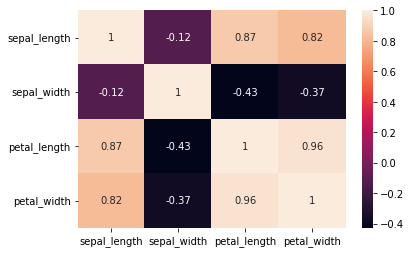

In [ ]:
#Correlación entre variables
correl = df.corr()
sns.heatmap(correl, annot=True)

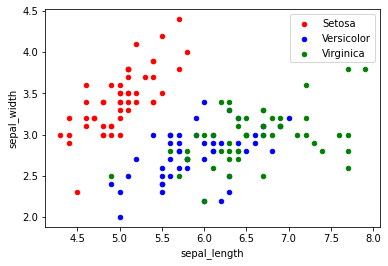

In [ ]:
x_var = 'sepal_length'
y_var = 'sepal_width'

main_plot = df[df['type'] == "Setosa"].plot(kind="scatter", x=x_var, y=y_var, color="red", label="Setosa")
df[df['type'] == "Versicolor"].plot(kind="scatter", x=x_var, y=y_var, color="blue", label="Versicolor", ax=main_plot)
df[df['type'] == "Virginica"].plot(kind="scatter", x=x_var, y=y_var, color="green", label="Virginica", ax=main_plot)

In [ ]:
feature_vector = []

for index, row in df.iterrows():
    fv = [row['sepal_length'], row['sepal_width'], row['petal_length'], row['petal_width']]
    LL, (LH, HL) = pywt.dwt(fv, 'haar')
    feature_vector.append(LL.tolist())

### Step 2: Etiquetar

In [ ]:
def EuclideanDistance(x, y):
  return math.sqrt(abs((x[0]-y[0])**2 + (x[1]-y[1])**2))

In [ ]:
def distTotal(data, centroides):
  index = 0
  min = 99999
  for i in centroides:
    # print(EuclideanDistance(data, i))
    if (EuclideanDistance(data, i) < min):
      min = EuclideanDistance(data, i)
      index = i
  return centroides.index(index)

In [ ]:
def generar_centroides(num_centroides_k):
  centroides = []
  for _ in range (num_centroides_k):
    tmp = (x[random.randint(0, len(x)-1)])
    centroides.append(tmp)
  return centroides

def get_centroide_tags(centroides, x):
  centroide_tags = []
  for i in x:
    ind = distTotal(i, centroides)
    centroide_tags.append(ind)
  return centroide_tags


### Step 3: Actualizar los centroides

In [ ]:
def get_mean_centroide(data, centroide_tags, current_centroide_tag):
    sum_coord_x = 0
    sum_coord_y = 0
    index = 0
    total = 0
    for tag in centroide_tags:
        if tag == current_centroide_tag:
            sum_coord_x += data[index][0]
            sum_coord_y += data[index][1]
            total += 1
        index += 1
    return [sum_coord_x/total, sum_coord_y/total]

def actualizar_centroides(data, centroide_tags):
    centroides = [0,1,2]
    new_centroides = []
    for current_centroide_tag in centroides:
        new_centroides.append(get_mean_centroide(data, centroide_tags, current_centroide_tag))
    return new_centroides

### Main

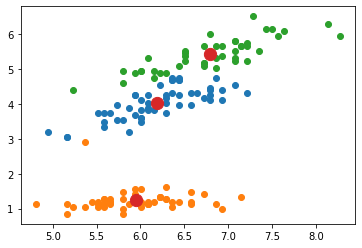

In [ ]:
k = 3
x = feature_vector
max_iterations = 0

# print(centroides)
centroides = generar_centroides(k)
centroide_tags = get_centroide_tags(centroides, x)

new_centroides = []
while centroides != new_centroides and max_iterations < 10:
    new_centroides = actualizar_centroides(x, centroide_tags)
    max_iterations += 1

x1 = []
y1 = []
x2 = []
y2 = []
x0 = []
y0 = []
x3 = [new_centroides[0][0], new_centroides[1][0], new_centroides[2][0]]
y3 = [new_centroides[0][1], new_centroides[1][1], new_centroides[2][1]]

for i in range (len(centroide_tags)):
  if (centroide_tags[i] == 0):
    x0.append(x[i][0])
    y0.append(x[i][1])
  if (centroide_tags[i] == 1):
    x1.append(x[i][0])
    y1.append(x[i][1])
  if (centroide_tags[i] == 2):
    x2.append(x[i][0])
    y2.append(x[i][1])

plt.scatter(x0, y0)
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.scatter(x3, y3, marker='o', s=150)

plt.show()


